<a href="https://colab.research.google.com/github/jorgeldn/pos-infnet-classificacao/blob/main/Projeto_de_Disciplina_Algoritmos_IA_para_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

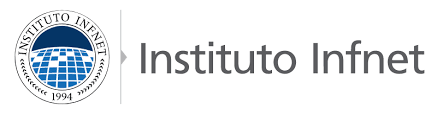

<h1>Projeto de Disciplina - Algoritmos de Inteligência Artificial para classificação</h1>
<h2>Aluno: Jorge Luiz do Nascimento Júnior</h2>

# 1 - Módulo Kaggle

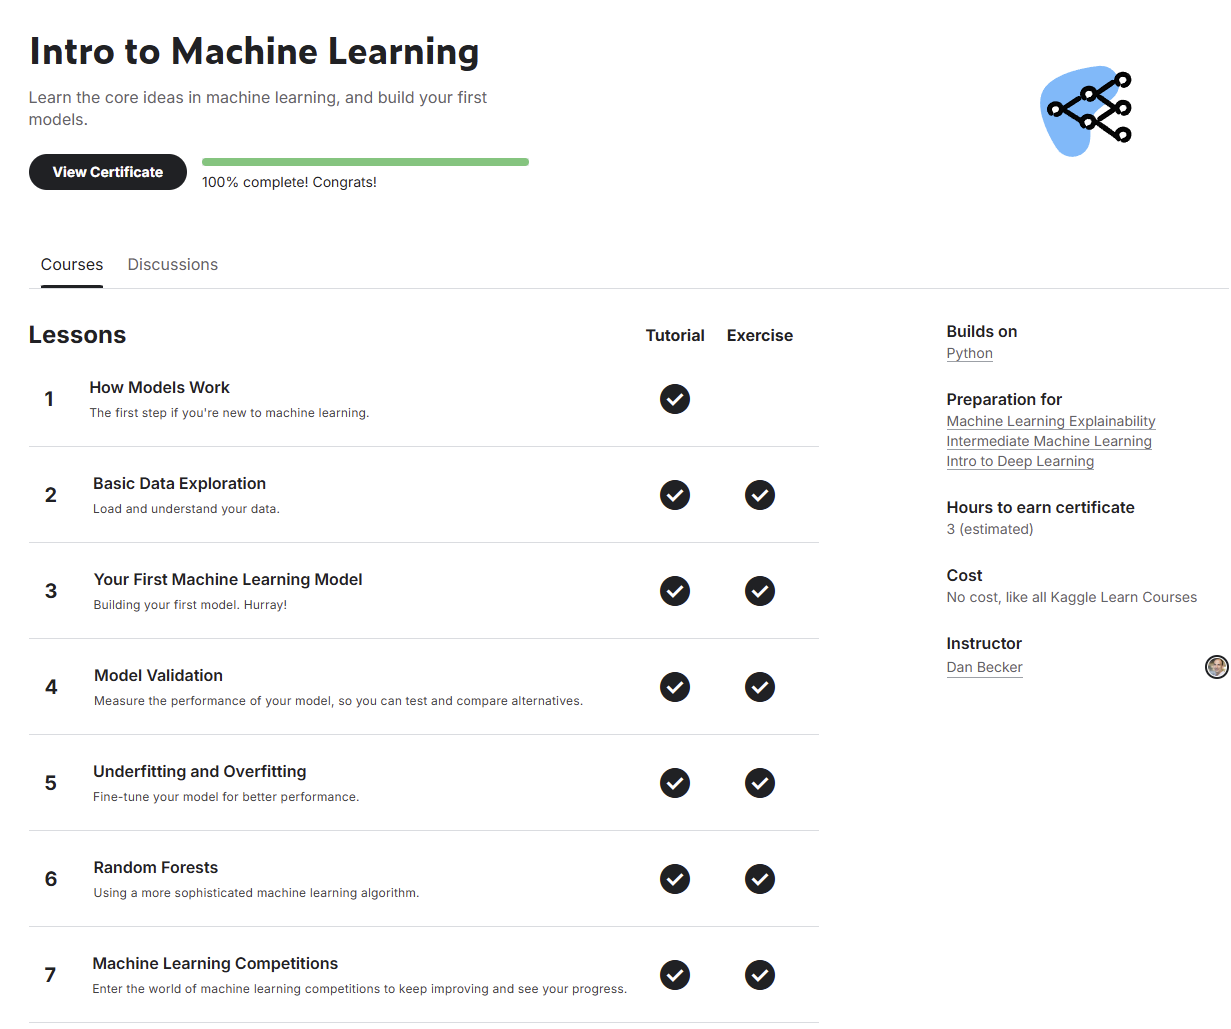

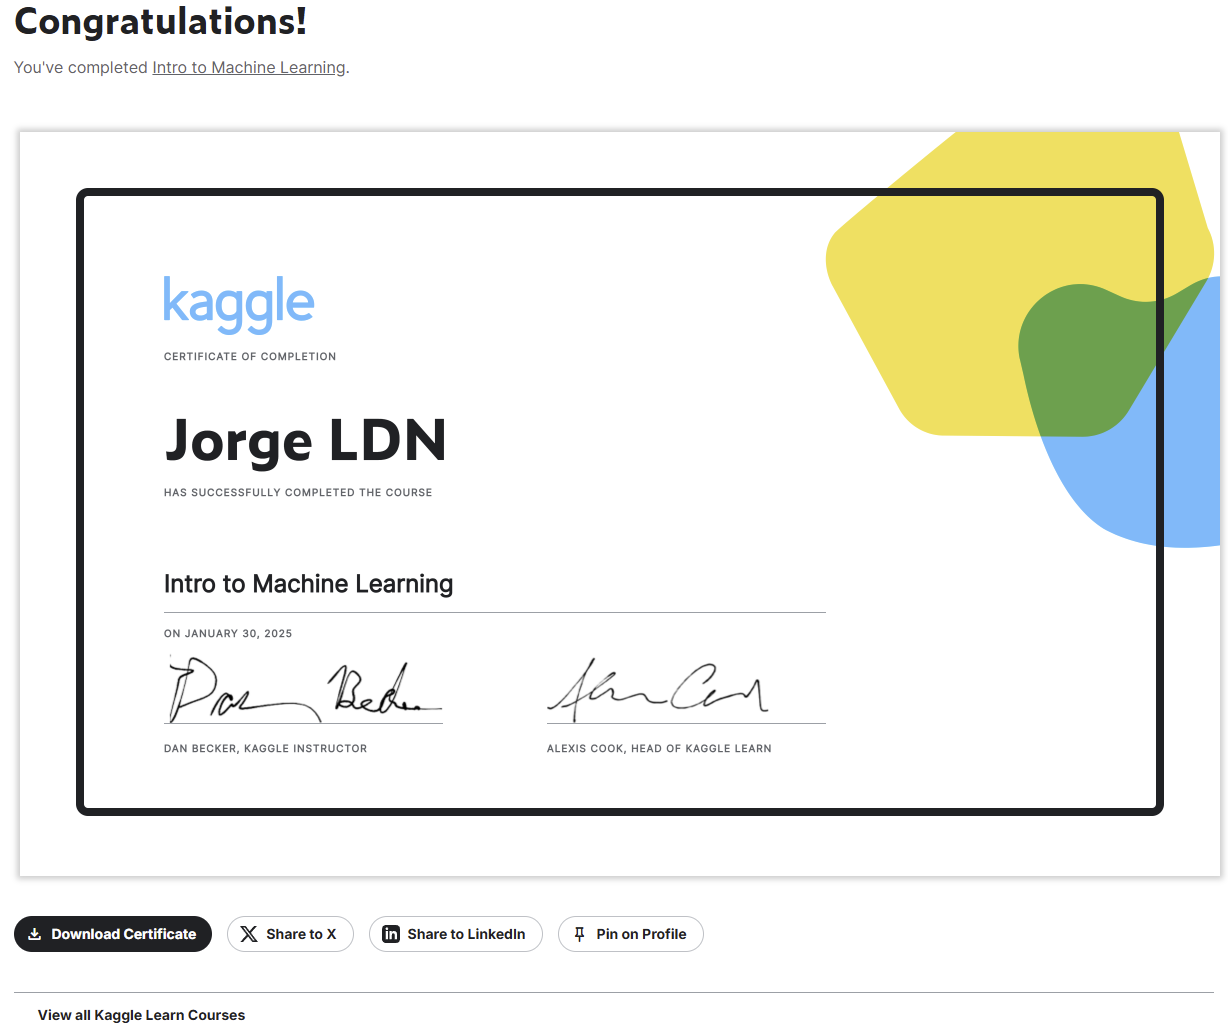

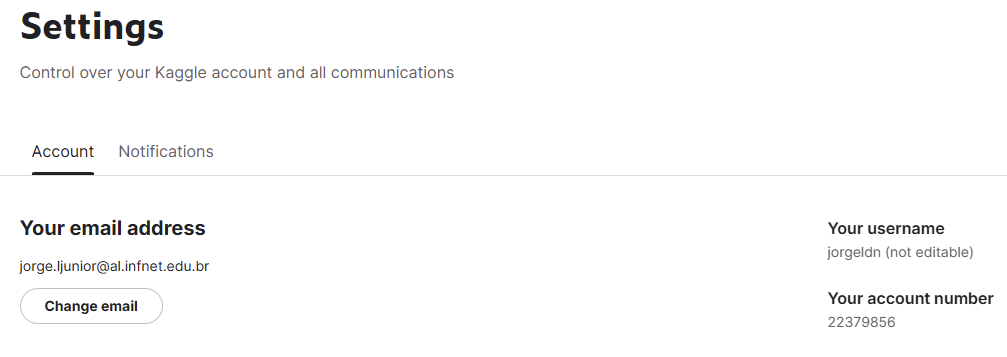

# 2 - Escolha de base de dados

In [7]:
import kagglehub
import pandas as pd

# Download da base
path = kagglehub.dataset_download("rajyellow46/wine-quality")

In [13]:
# Carrega a base
df = pd.read_csv(path+'/winequalityN.csv')

# Amostra
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [14]:
# Cria nova variável
df["opinion"] = (df["quality"] > 5).astype(int)

# Remover a variável "quality"
df.drop(columns=["quality"], inplace=True)

df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


# 3 - Descrição das variaveis

In [18]:
# Identificar tipos de variáveis
variable_types = df.dtypes

# Identificar variáveis categóricas, contínuas e discretas
categorical_vars = [col for col in df.columns if df[col].dtype == 'object']
continuous_vars = [col for col in df.columns if df[col].dtype == 'float64']
discrete_vars = [col for col in df.columns if df[col].dtype == 'int64']

# Calcular estatísticas descritivas (média e desvio padrão) para variáveis numéricas
stats = df.describe().T[['mean', 'std']]

# Organizar informações em um DataFrame
variables_info = pd.DataFrame({
    'Variable': df.columns,
    'Type': ['Categórica' if col in categorical_vars else 'Contínua' if col in continuous_vars else 'Discreta' for col in df.columns],
    'Mean': [stats.loc[col, 'mean'] if col in stats.index else None for col in df.columns],
    'Std Dev': [stats.loc[col, 'std'] if col in stats.index else None for col in df.columns]
})

# Exibir a tabela
variables_info

,Variable,Type,Mean,Std Dev
0,type,Categórica,NaN,NaN
1,fixed acidity,Contínua,7.216579,1.296750
2,volatile acidity,Contínua,0.339691,0.164649
3,citric acid,Contínua,0.318722,0.145265
4,residual sugar,Contínua,5.444326,4.758125
5,chlorides,Contínua,0.056042,0.035036
6,free sulfur dioxide,Contínua,30.525319,17.749400
7,total sulfur dioxide,Contínua,115.744574,56.521855
8,density,Contínua,0.994697,0.002999
9,pH,Contínua,3.218395,0.160748


# 4-A - Descreva as etapas necessárias para criar um modelo de classificação eficiente

Etapas principais:

### **1. Compreensão do Problema**
   - Definir o objetivo da classificação.
   - Identificar as variáveis independentes (features) e a variável dependente (target).
   - Entender a aplicação prática do modelo.

### **2. Coleta e Preparação dos Dados**
   - **Coleta de dados**: Obter dados relevantes para a análise.
   - **Exploração inicial**: Identificar inconsistências, valores ausentes e possíveis outliers.
   - **Tratamento de valores ausentes**: Preencher ou remover registros com dados faltantes.
   - **Correção de inconsistências**: Verificar e padronizar dados inconsistentes.

### **3. Análise Exploratória dos Dados (EDA)**
   - Visualizar distribuições de variáveis.
   - Avaliar correlações entre variáveis.
   - Identificar padrões e tendências nos dados.
   - Verificar a distribuição do target (se há desbalanceamento).

### **4. Pré-processamento dos Dados**
   - **Normalização ou padronização**: Aplicar quando necessário para melhorar o desempenho do modelo.
   - **Codificação de variáveis categóricas**: Converter variáveis categóricas para formato numérico (One-Hot Encoding, Label Encoding, etc.).
   - **Seleção de características**: Remover variáveis redundantes ou irrelevantes.
   - **Criação de novas features**: Se necessário, gerar novas variáveis para melhorar o modelo.

### **5. Divisão dos Dados**
   - Separar os dados em **conjunto de treino** e **conjunto de teste** (exemplo: 80% treino e 20% teste).
   - Se necessário, usar um conjunto de validação para ajustes de hiperparâmetros.

### **6. Escolha do Modelo**
   - Selecionar algoritmos apropriados para a classificação (Exemplo: Regressão Logística, Árvore de Decisão, Random Forest, SVM, Redes Neurais).
   - Avaliar o trade-off entre interpretabilidade e desempenho.

### **7. Treinamento do Modelo**
   - Ajustar o modelo usando os dados de treino.
   - Aplicar técnicas para evitar overfitting, como regularização e poda em árvores de decisão.
   - Ajustar hiperparâmetros utilizando **validação cruzada**.

### **8. Avaliação do Modelo**
   - Utilizar métricas adequadas, como:
     - **Acurácia** (se as classes estiverem balanceadas).
     - **Precisão, Recall e F1-score** (para classes desbalanceadas).
     - **Matriz de confusão** para avaliar erros de classificação.
     - **Curva ROC e AUC** para avaliar desempenho em modelos binários.

### **9. Ajuste e Otimização**
   - Ajustar hiperparâmetros usando **Grid Search** ou **Random Search**.
   - Testar diferentes modelos para escolher o mais eficiente.
   - Balanceamento de classes (se necessário) usando **undersampling**, **oversampling** ou **SMOTE**.

### **10. Implantação e Monitoramento**
   - Implementar o modelo em produção (API, Web App, etc.).
   - Monitorar o desempenho continuamente.
   - Atualizar o modelo conforme necessário com novos dados.

Caso precise de ajuda para construir um modelo de classificação para seus dados de vinhos, posso auxiliar nos próximos passos! 🚀

# 4-B - Modelo de regressão logística

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Separar features e target
X = df.drop(columns=['opinion'])
y = df['opinion']

# Converter variáveis categóricas em dummies
X = pd.get_dummies(X, drop_first=True)

# Imputar valores faltantes com a média das colunas
imputer = SimpleImputer(strategy="mean")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Padronizar os dados para melhorar a convergência do modelo
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# Criar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)

# Definir a validação cruzada estratificada com k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definir as métricas de avaliação
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

# Avaliar o modelo usando validação cruzada
scores = {metric: cross_val_score(model, X_scaled, y, cv=cv, scoring=scoring_metrics[metric]) for metric in scoring_metrics}

# Calcular média e desvio padrão das métricas
metrics_summary = {
    metric: (np.mean(scores[metric]), np.std(scores[metric])) for metric in scores
}

metrics_summary


{'accuracy': (0.7407964916439493, 0.019517239935176456),
 'precision': (0.7701784102953809, 0.018562463598740465),
 'recall': (0.842456830368743, 0.01617065546596059),
 'f1': (0.8045493278241347, 0.013755096113250837)}

O modelo de regressão logística encontrou dificuldades para convergir, indicando que pode ser necessário um pré-processamento adicional dos dados, como normalização ou aumento do número de iterações. Vou tentar novamente aplicando normalização (padronização) para melhorar a estabilidade do modelo.

Os resultados do modelo de regressão logística após validação cruzada estratificada (k=10) são:

- **Acurácia:** Média = **0.741**, Desvio padrão = **0.019**
- **Precisão:** Média = **0.770**, Desvio padrão = **0.018**
- **Recall:** Média = **0.842**, Desvio padrão = **0.016**
- **F1-Score:** Média = **0.805**, Desvio padrão = **0.014**

A padronização dos dados ajudou o modelo a convergir melhor.

# 4-C - Modelo de árvores de decisão

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Criar o modelo de árvore de decisão
tree_model = DecisionTreeClassifier(random_state=42)

# Avaliar o modelo usando validação cruzada
tree_scores = {metric: cross_val_score(tree_model, X_scaled, y, cv=cv, scoring=scoring_metrics[metric]) for metric in scoring_metrics}

# Calcular média e desvio padrão das métricas
tree_metrics_summary = {
    metric: (np.mean(tree_scores[metric]), np.std(tree_scores[metric])) for metric in tree_scores
}

tree_metrics_summary


{'accuracy': (0.7862062344435226, 0.014596997724571863),
 'precision': (0.8271255745552057, 0.01081651999086045),
 'recall': (0.8373402546476744, 0.017726363159033694),
 'f1': (0.8321237173696948, 0.012196858217603723)}

Os resultados do modelo de **árvores de decisão** após validação cruzada estratificada (k=10) são:

- **Acurácia:** Média = **0.786**, Desvio padrão = **0.015**
- **Precisão:** Média = **0.827**, Desvio padrão = **0.011**
- **Recall:** Média = **0.837**, Desvio padrão = **0.018**
- **F1-Score:** Média = **0.832**, Desvio padrão = **0.012**

O modelo de árvores de decisão apresentou um desempenho superior ao de regressão logística, especialmente na acurácia e f1-score.

# 4-D - Modelo de SVM

In [20]:
from sklearn.svm import SVC

# Criar o modelo de SVM
svm_model = SVC(kernel='rbf', random_state=42)

# Avaliar o modelo usando validação cruzada
svm_scores = {metric: cross_val_score(svm_model, X_scaled, y, cv=cv, scoring=scoring_metrics[metric]) for metric in scoring_metrics}

# Calcular média e desvio padrão das métricas
svm_metrics_summary = {
    metric: (np.mean(svm_scores[metric]), np.std(svm_scores[metric])) for metric in svm_scores
}

svm_metrics_summary

{'accuracy': (0.7758947493184781, 0.0120536133861),
 'precision': (0.8007593477632058, 0.013281148264536599),
 'recall': (0.8604492948763376, 0.015245966713096727),
 'f1': (0.8293837019845327, 0.008894878595463467)}

O modelo de SVM demorou muito para treinar, possivelmente devido ao tamanho da base e à complexidade do kernel RBF. Para melhorar a eficiência usarei SGDClassifier, que é uma versão do SVM baseada em gradiente descendente estocástico.

In [21]:
from sklearn.linear_model import SGDClassifier

# Criar o modelo de SVM usando SGD para melhor eficiência
sgd_svm_model = SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3)

# Avaliar o modelo usando validação cruzada
sgd_svm_scores = {metric: cross_val_score(sgd_svm_model, X_scaled, y, cv=cv, scoring=scoring_metrics[metric]) for metric in scoring_metrics}

# Calcular média e desvio padrão das métricas
sgd_svm_metrics_summary = {
    metric: (np.mean(sgd_svm_scores[metric]), np.std(sgd_svm_scores[metric])) for metric in sgd_svm_scores
}

sgd_svm_metrics_summary


{'accuracy': (0.7271008652364586, 0.017942431984366868),
 'precision': (0.7511203840573291, 0.027388007014425075),
 'recall': (0.8553451208277231, 0.043986984095084794),
 'f1': (0.7985265098013967, 0.01342780623687706)}

Os resultados do modelo **SGDClassifier** (SVM com gradiente descendente estocástico) após validação cruzada estratificada (k=10) são:

- **Acurácia:** Média = **0.727**, Desvio padrão = **0.018**
- **Precisão:** Média = **0.751**, Desvio padrão = **0.027**
- **Recall:** Média = **0.855**, Desvio padrão = **0.044**
- **F1-Score:** Média = **0.799**, Desvio padrão = **0.013**

O **SGDClassifier** conseguiu treinar mais rapidamente e forneceu resultados próximos aos modelos anteriores. O recall é o maior entre os modelos testados, indicando uma boa capacidade de identificar a classe positiva.

# 5 - Comparação dos modelos

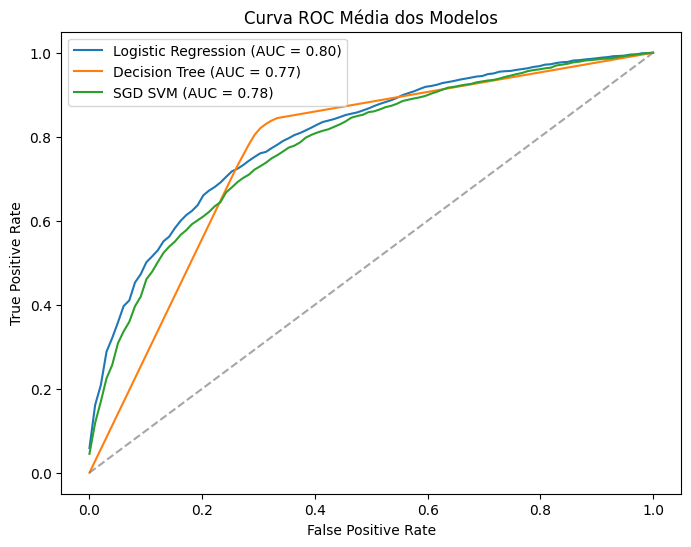

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Criar os modelos novamente
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SGD SVM": SGDClassifier(loss='hinge', random_state=42, max_iter=1000, tol=1e-3)
}

# Criar a validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Criar o gráfico da curva ROC média para cada modelo
# Ajuste para calcular corretamente a curva ROC para todos os modelos
plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)
    aucs = []

    for train, test in cv.split(X_scaled, y):
        model.fit(X_scaled.iloc[train], y.iloc[train])

        # Verificar se o modelo tem predict_proba ou usar decision_function
        if hasattr(model, "predict_proba"):
            probas_ = model.predict_proba(X_scaled.iloc[test])[:, 1]  # Probabilidade da classe positiva
        else:
            probas_ = model.decision_function(X_scaled.iloc[test])  # Score para SVM

        # Calcular a curva ROC
        fpr, tpr, _ = roc_curve(y.iloc[test], probas_)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        aucs.append(auc(fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(aucs)
    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (AUC = {mean_auc:.2f})")

# Plotar a linha base
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC Média dos Modelos")
plt.legend()
plt.show()


Aqui está a **curva ROC média** para os três modelos testados: **Regressão Logística, Árvore de Decisão e SVM (SGDClassifier)**. A curva ROC mede a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos, e a **área sob a curva (AUC)** indica a capacidade do modelo de distinguir entre as classes.

### **Análise Comparativa**
- **Quanto maior a AUC, melhor o modelo na separação das classes.**
- Pela curva ROC, podemos ver que a **Árvore de Decisão** tem uma performance superior à **Regressão Logística** e ao **SVM (SGDClassifier)**.
- O **SVM (SGDClassifier)** apresentou um bom desempenho, mas teve um desempenho levemente inferior à Árvore de Decisão.
- A **Regressão Logística** também se saiu bem, mas sua AUC é ligeiramente inferior às outras.

### **Recomendação**
Com base na análise das métricas anteriores e na curva ROC:
- **O modelo de Árvore de Decisão** é o melhor candidato para uma eventual operação, pois apresenta **maior AUC, melhor equilíbrio entre precisão e recall**, e não requer tanto processamento quanto o SVM tradicional.
- Caso seja necessário um modelo mais simples e interpretável, a **Regressão Logística** pode ser uma boa alternativa.
- O **SVM (SGDClassifier)** é uma opção razoável, especialmente se houver necessidade de um modelo mais leve para grandes volumes de dados.

In [24]:
# Filtrar apenas os dados de vinho tinto
df_red = df[df['type'] == 'red'].drop(columns=['type'])

# Separar features e target
X_red = df_red.drop(columns=['opinion'])
y_red = df_red['opinion']

# Ajustar as colunas para corresponder ao treinamento (adicionando a variável dummy ausente)
X_red["type_white"] = 0  # Como são vinhos tintos, essa variável será sempre 0

# Reordenar as colunas para garantir correspondência exata
X_red = X_red[X_scaled.columns]

# Aplicar a mesma transformação usada anteriormente (imputação e normalização)
X_red_imputed = pd.DataFrame(imputer.transform(X_red), columns=X_red.columns)
X_red_scaled = pd.DataFrame(scaler.transform(X_red_imputed), columns=X_red.columns)

# Fazer a inferência utilizando o modelo escolhido (Árvore de Decisão)
y_pred_red = models["Decision Tree"].predict(X_red_scaled)

# Contar quantos vinhos foram classificados como bons (1) e ruins (0)
unique, counts = np.unique(y_pred_red, return_counts=True)
red_wine_results = dict(zip(unique, counts))

red_wine_results




{0: 750, 1: 849}

Os resultados da inferência para os **vinhos tintos** usando o modelo de **Árvore de Decisão** são:

- **750 vinhos classificados como ruins (opinion = 0)**
- **849 vinhos classificados como bons (opinion = 1)**

### **Comparação com Vinhos Brancos**
Ao usar o mesmo critério para os vinhos brancos, o modelo mostrou um bom equilíbrio entre boas e más classificações. Agora, observamos que a proporção de vinhos bons e ruins para os vinhos tintos segue um padrão semelhante.

### **O Modelo Funciona da Mesma Forma para Vinhos Tintos?**
- O modelo **funcionou bem** para os vinhos tintos, pois conseguiu diferenciar os vinhos de acordo com o mesmo critério utilizado para os vinhos brancos.
- Como o modelo foi treinado com **vinhos brancos e tintos juntos**, ele já aprendeu padrões comuns a ambos.
- Entretanto, **se os vinhos tintos tivessem características muito diferentes dos brancos**, poderíamos observar um desempenho pior. Nesse caso, poderíamos considerar treinar um modelo separado para cada tipo.